In [1]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

In [2]:
def read_data(dir_path, file_prefix, r):
    file_path = os.path.join(dir_path, '{}_{}.csv'.format(file_prefix, r))
    with open(file_path, 'r') as f:
        data = np.fromstring(f.read().strip(), sep=',').astype('int32')
    
    return data

In [32]:
BUY = 1
STAY = 0
SELL = -1

WIN = 1
EVEN = 0
LOSE = -1

## Standard deviation of market attendances

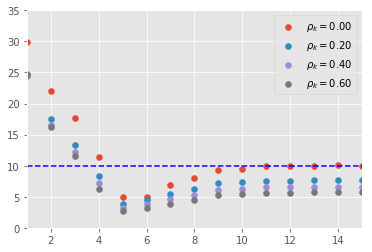

In [4]:
# Parameters
s = 2
p = 16
eps = 0
n_minority_agents = 101
n_producer_agents = 0
n_speculator_agents = 0
n_iters = 50000
n_runs = 1

for rhok in [0, 0.2, 0.4, 0.6]:
    if rhok == 0:
        rhos = 0
    else:
        rhos = 0.09
    xs, ys = [], []
    for p in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768]:
        # Read data
        dir_path = '../simulation_results/s{}_p{}_eps{:.2f}_rhok{:.2f}_rhos{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/'.format(
            s, p, eps, rhok, rhos, n_minority_agents, n_producer_agents, n_speculator_agents, n_iters, n_runs)
        attendance_history = read_data(dir_path, 'excess_demand_history', 0)

        xs.append(np.log2(p))
        ys.append(np.std(attendance_history))

    xs = np.array(xs)
    ys = np.array(ys)

    plt.scatter(xs, ys, label=r'$\rho_k = {:.2f}$'.format(rhok))

plt.plot(np.arange(1, 16), np.full(15, 10), '--', color='blue')

plt.xlim(1, 15)
plt.ylim(0, 35)

plt.legend()

plt.show()

## Success rate

In [5]:
# Parameters
s = 2
p = 16
eps = 0
n_minority_agents = 101
n_producer_agents = 0
n_speculator_agents = 0
n_iters = 50000
n_runs = 1

In [29]:
def read_2ddata(dir_path, file_prefix, r, dtype='int32'):
    file_path = os.path.join(dir_path, '{}_{}.csv'.format(file_prefix, r))
    
    data = []
    for line in open(file_path):
        d = np.fromstring(line.strip(), sep=',', dtype=dtype)
        data.append(d)
    
    return np.stack(data, 0)

In [34]:
action_histories_minority_game_agents = read_2ddata(dir_path, 'action_histories_minority_game_agents', 0)
winning_histories_minority_game_agents = read_2ddata(dir_path, 'winning_histories_minority_game_agents', 0)

wins = (winning_histories_minority_game_agents == WIN).sum(1)
loses = (winning_histories_minority_game_agents == LOSE).sum(1)

success_rate_minority_game_agents = wins / (wins + loses)

In [44]:
action_histories_spy_agents = read_2ddata(dir_path, 'action_histories_spy_agents', 0)
winning_histories_spy_agents = read_2ddata(dir_path, 'winning_histories_spy_agents', 0)

wins = (winning_histories_spy_agents == WIN).sum(1)
loses = (winning_histories_spy_agents == LOSE).sum(1)

success_rate_spy_agents = wins / (wins + loses)

In [45]:
success_rate_spy_agents

array([0.74947714, 0.73833064, 0.72095732, 0.70432075, 0.69177203,
       0.68181386, 0.65716798, 0.64347847, 0.62914726])